# Exercise 2.2 - Regularised Logistic Regression
We can regularization the logistic regression algorithm to reduce overfitting.

Regularization maintains all the features but seeks to minimise the magitude of $\theta_i$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt

from sklearn.preprocessing import PolynomialFeatures

# Load and examine data
path = os.path.join(os.getcwd(), 'data', 'ex2data2.txt')
data = pd.read_csv(path, header=None, names=['Microchip Test 1','Microchip Test 2','Accepted'])
data.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [2]:
data.describe()

,Microchip Test 1,Microchip Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Now let's visualise the data

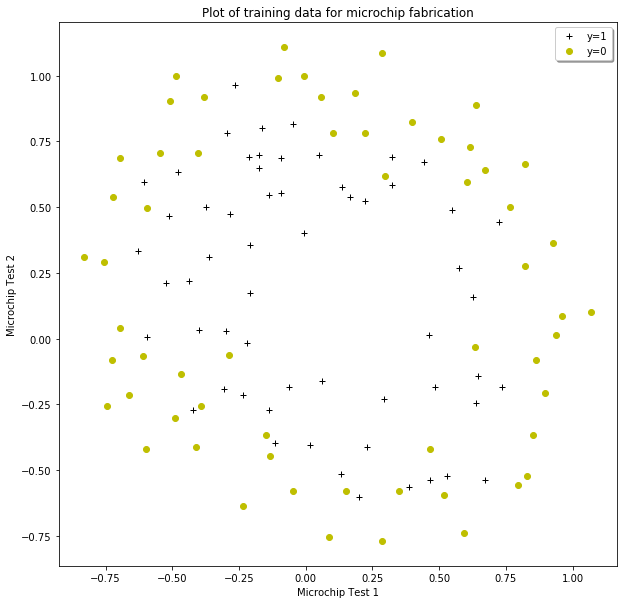

In [3]:
plt.figure(figsize=(10, 10))
plt.plot(data.loc[data['Accepted'] == 1, 'Microchip Test 1'],
         data.loc[data['Accepted'] == 1, 'Microchip Test 2'],
         'k+', label='y=1')
plt.plot(data.loc[data['Accepted'] == 0, 'Microchip Test 1'],
         data.loc[data['Accepted'] == 0, 'Microchip Test 2'],
         'yo', label='y=0')
plt.legend(loc='upper right', shadow=True)
plt.title('Plot of training data for microchip fabrication')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.show()

In the figure above, we can see that the dataset cannot be separated simply using a linear decision boundary. Therefore, we need a more complex application of logistic regression.

## Feature Mapping
We can improve the fit whilst still using logistic regression by creating more features from each data points. We map the features into polynomial terms of $x_1$ and $x_2$ up to the sixth order.

In [4]:
m, n = data.shape
poly = PolynomialFeatures(degree=6)
X = np.matrix(poly.fit_transform(np.array(data)[:, 0:2]))
y = np.matrix(data.iloc[:,(n-1)]).T
theta = np.zeros(X.shape[1])

X.shape, theta.shape, y.shape

((118, 28), (28,), (118, 1))

## Cost Function and Gradient
The regularised cost function in logistic regression is given by:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}\text{log}(h_\theta(x^{(i)})) - (1-y^{(i)})\text{log}(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

In [5]:
def costFunctionReg(theta, X, y, lambd):
    """ Compute the cost for regularised logistic regression """
    
    # Compute cost
    m = y.size
    n = theta.size
    theta = np.matrix(theta)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T))) 
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lambd/2*m) * np.sum(theta[:, 1:n])
    J = (np.sum(first - second) / m) + reg
    
    return J

The regularised gradient is given by:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j $$

for $j \geq 1$

In [6]:
def gradientReg(theta, X, y, lambd):
    "Compute the gradient for a single step of regularised logistic regression"
    
    m = y.size
    n = theta.size
    theta = np.matrix(theta)
    grad = np.zeros(n)
    
    error = sigmoid(X * theta.T) - y
    
    # Compute gradient in each dimension
    for j in range(n):
        grad[j] = np.sum(np.multiply(error, X[:,j])) / m
        if j > 0:
            grad[j] += (lambd/m)*theta[0,j]
        
    return grad

Testing the cost function on the initial guess:

In [7]:
def sigmoid(z):
    """ Performs the sigmoid function element-wise over the matrix z """
    
    return 1 / (1 + np.exp(-z))

learning_rate = 1

costFunctionReg(theta, X, y, learning_rate)

0.6931471805599454

Now, let's learn the parameters as in the previous part

In [10]:
result = opt.fmin_tnc(func=costFunctionReg, x0=theta, fprime=gradientReg, args=(X, y, learning_rate))
theta = result[0]
cost = costFunctionReg(theta, X, y, learning_rate)
print('cost = ', cost)

cost =  -660.4991785935945
